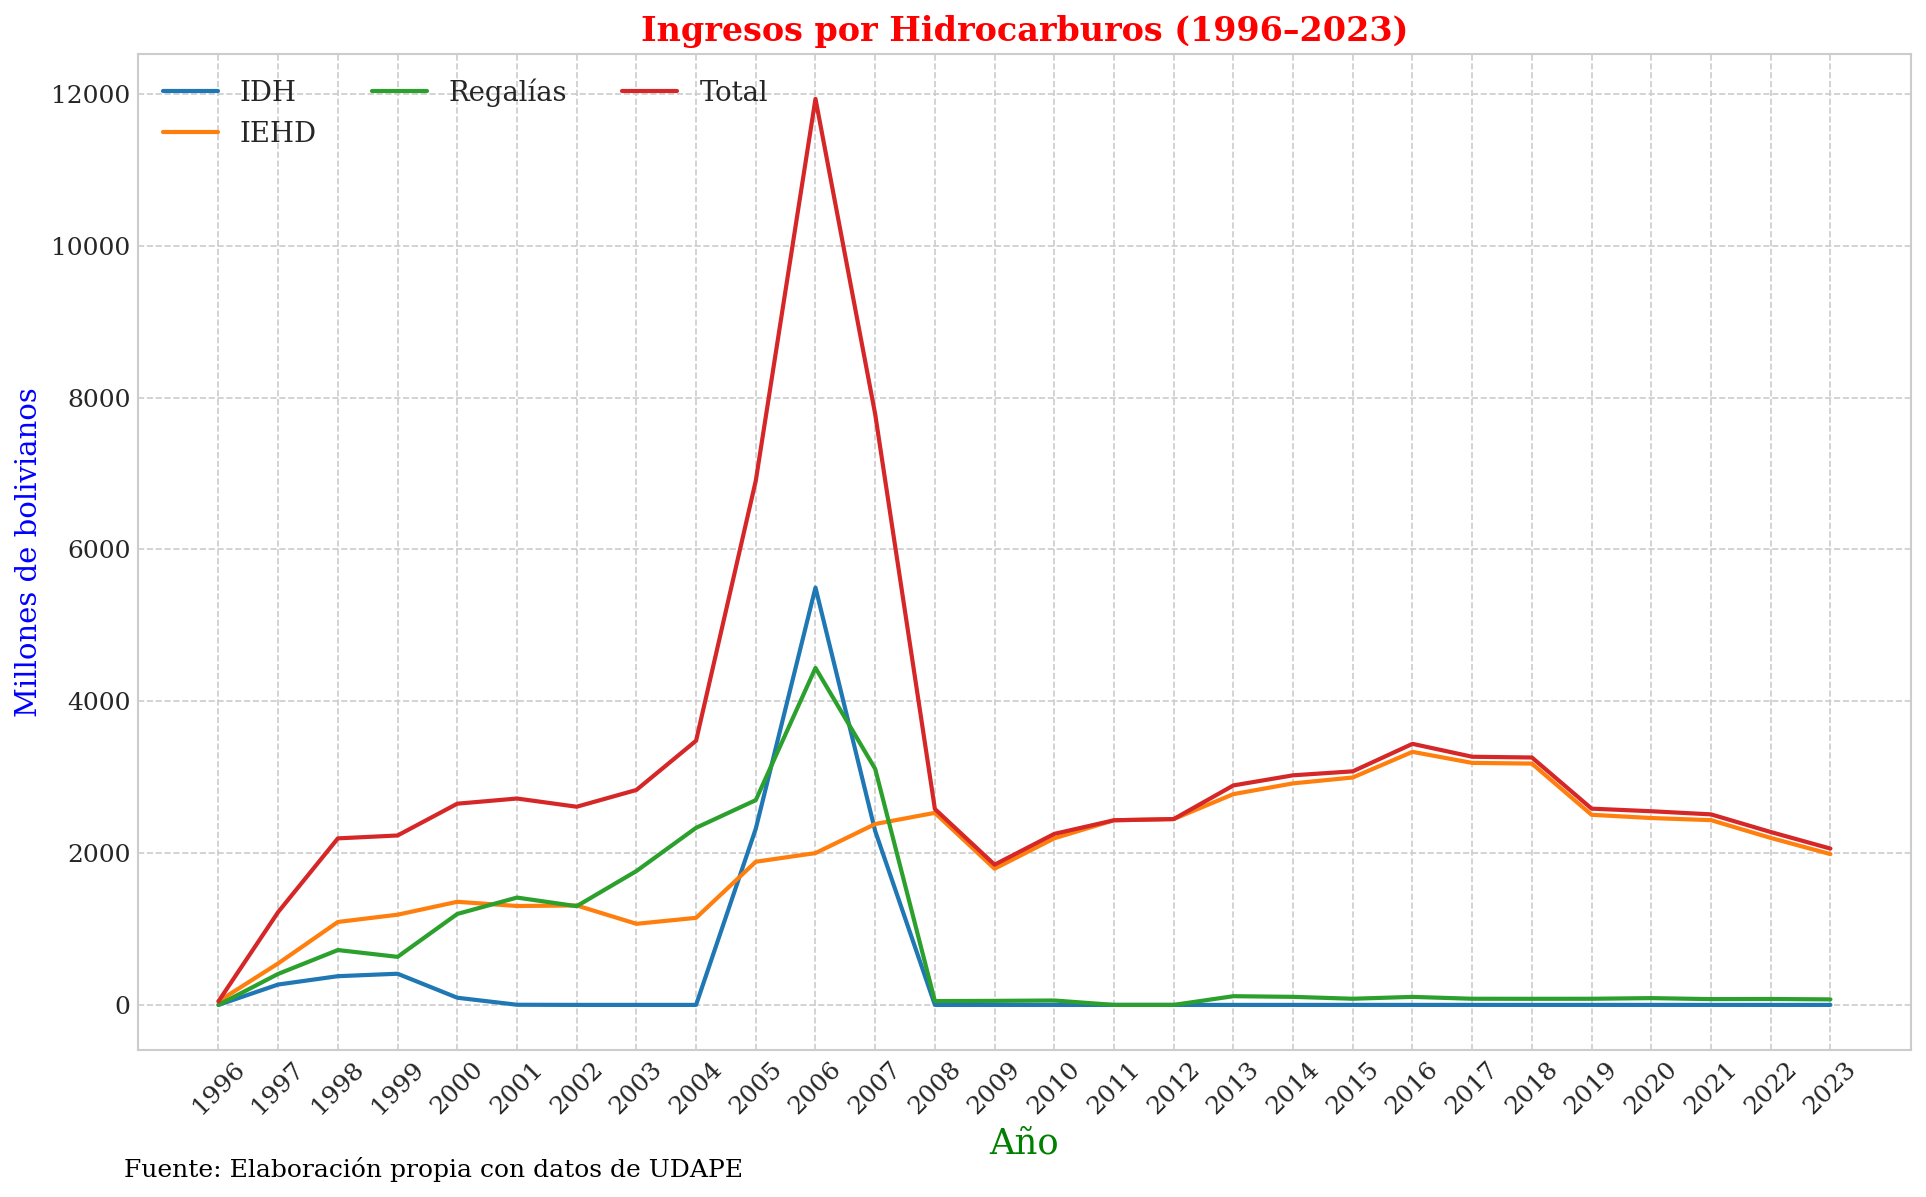

In [6]:
import pandas as pd
import sqlite3
import os, sys
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../'))
from graficos_utils import (
    set_style,
    init_base_plot,
    add_hitos,
    add_year_value_annotations,
    add_cycle_means_multi,
    add_participation_cycle_boxes,
    adjust_annot_years,
    adjust_periods
)
from config import DB_PATH, ASSETS_DIR, CYCLES, hitos_v, annot_years, periodos_tasas

# ── 1. Configuración general ─────────────────────────────────────────
output_dir = ASSETS_DIR / "serie_completa" / "ingresos_hidrocarburos"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ── 2. Carga de datos ────────────────────────────────────────────────
conn = sqlite3.connect('../../../../db/proyectomacro.db')
df = pd.read_sql(
    """
    SELECT año,
           idh,
           iehd,
           regalias,
           ingresos_hidrocarburos_total
      FROM ingresos_hidrocarburos
    """,
    conn,
    index_col="año"
)
conn.close()

# ── 3. Ajuste de años y periodos ─────────────────────────────────────
years   = adjust_annot_years(df, annot_years)
periods = adjust_periods(df, periodos_tasas)

# ── 4. Componentes y colores ────────────────────────────────────────
componentes = [
    ("idh", "IDH"),
    ("iehd", "IEHD"),
    ("regalias", "Regalías"),
    ("ingresos_hidrocarburos_total", "Total")
]
columns = [c for c, _ in componentes]
abbr_map = {c: label for c, label in componentes}

cmap = plt.get_cmap("tab10")
colors = {c: cmap(i) for i, (c, _) in enumerate(componentes)}

# ── 5. Offsets definidos individualmente ────────────────────────────
hitos_offset = {
    1952: 0.85, 1956: 0.85, 1970: 0.85, 1982: 0.85,
    1985: 0.85, 2001: 0.85, 2006: 0.85, 2014: 0.85
}

annotation_offsets = {
    "idh": {
        2001: (0,   300),
        2006: (0,   350),
        2014: (-1.5,-450),
        2023: (0,  -500),
    },
    "iehd": {
        2001: (0,    200),
        2006: (0.3, -250),
        2014: (0.5,  300),
        2023: (0.2, -200),
    },
    "regalias": {
        2001: (0,   -200),
        2006: (-0.8, 400),
        2014: (0.8, -350),
        2023: (0,    250),
    },
    "ingresos_hidrocarburos_total": {
        2001: (0,    400),
        2006: (1.0,  450),
        2014: (-1.0,-500),
        2023: (0,    600),
    },
}

medias_offsets = {
    "Crisis 52-55":      (1952, 1),
    "Expansión 56-69":   (1956, 1),
    "Recesión 70-81":    (1970, 1),
    "Crisis 82-84":      (1982, 1),
    "Expansión 85-00":   (1985, 1),
    "Transicion 01-05":  (2001, 1),
    "Expansión 06-14":   (2006, 1),
    "Recesión 15-24":    (2015, 1),
}
tasas_offsets = {
    "1952-1955": (1953, 0.8),
    "1956-1969": (1962, 0.8),
    "1970-1981": (1975, 0.8),
    "1982-1984": (1983, 0.8),
    "1985-2000": (1992, 0.8),
    "2001-2005": (2003, 0.8),
    "2006-2014": (2010, 0.8),
    "2015-2022": (2018, 0.8),
}
participation_offsets = {
    "1952-1955": (1953, 0.6),
    "1956-1969": (1962, 0.6),
    "1970-1981": (1975, 0.6),
    "1982-1984": (1983, 0.6),
    "1985-2000": (1992, 0.6),
    "2001-2005": (2003, 0.6),
    "2006-2014": (2010, 0.6),
    "2015-2022": (2018, 0.6),
}

# ── 6. Dibujar gráfica ──────────────────────────────────────────────
fig, ax = init_base_plot(
    df=df,
    series=componentes,
    colors=colors,
    title=f"Ingresos por Hidrocarburos ({df.index[0]}–{df.index[-1]})",
    xlabel="Año",
    ylabel="Millones de bolivianos"
)

# add_hitos(ax, df.index, hitos_v, hitos_offset)
# add_year_value_annotations(ax, df, years, columns, annotation_offsets, colors)

# # Estadísticas de ciclos (participación media de cada componente)
# cycle_stats = {
#     name: (
#         (df.loc[period, columns] / df.loc[period, "ingresos_hidrocarburos_total"]) * 100
#     ).mean().to_dict()
#     for name, period in CYCLES.items()
# }

# y_max = ax.get_ylim()[1]
# line_spacing = y_max * 0.03

# add_cycle_means_multi(
#     ax,
#     cycle_stats,
#     medias_offsets,
#     abbr_map,
#     colors,
#     line_spacing
# )

# add_participation_cycle_boxes(
#     ax,
#     df,
#     periods,
#     ["idh", "iehd", "regalias"],
#     "ingresos_hidrocarburos_total",
#     participation_offsets,
#     abbr_map,
#     colors
# )


# ── 7. Guardar imagen ───────────────────────────────────────────────
fig.savefig(output_dir / "grafica1_ingresos_hidrocarburos.png")
